# Flight Ticket Prediction

In [1]:
#Importing Libraries

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt                                         
%matplotlib inline

import seaborn as sns
from plotly.subplots import make_subplots
from sklearn import metrics

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_excel("Data_Train.xlsx")
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [3]:
df.shape

(10683, 11)

In [4]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

# DataAnalysing

In [5]:
print("Test data Info")
print("-"*75)
print(df.info())

print()
print()

print("Null values :")
print("-"*75)
df.dropna(inplace = True)
print(df.isnull().sum())

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
De

# EDA 

In [6]:
# Date_of_Journey
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute
df.drop(["Arrival_Time"], axis = 1, inplace = True)


In [7]:
#DURATION
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"  
        else:
            duration[i] = "0h " + duration[i]

In [8]:
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 

In [9]:
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins
df.drop(["Duration"], axis = 1, inplace = True)

In [10]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Total_Stops        0
Additional_Info    0
Price              0
Journey_day        0
Journey_month      0
Dep_hour           0
Dep_min            0
Arrival_hour       0
Arrival_min        0
Duration_hours     0
Duration_mins      0
dtype: int64

# CategoricalColumns

In [11]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

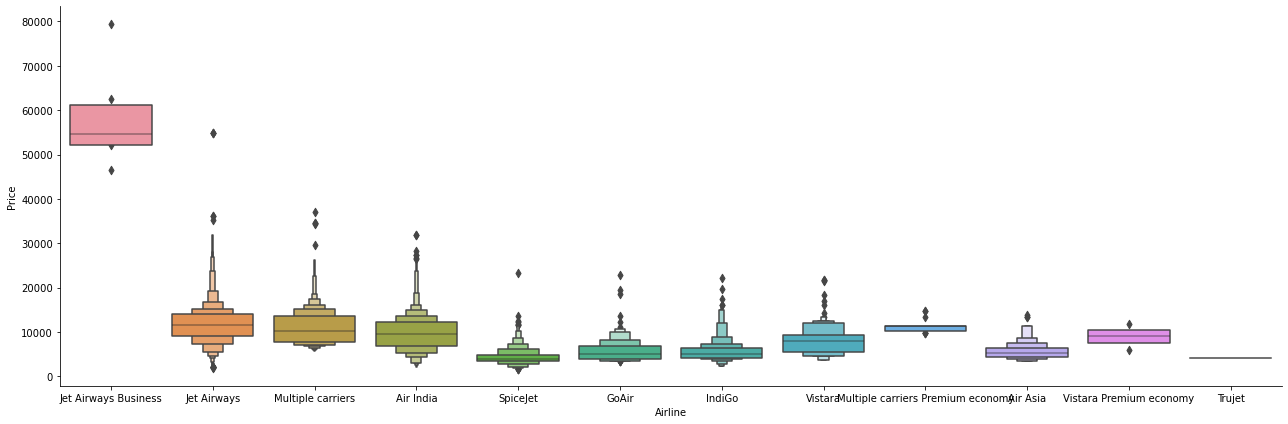

In [12]:
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Jet Airways Business'),
  Text(1, 0, 'Jet Airways'),
  Text(2, 0, 'Multiple carriers'),
  Text(3, 0, 'Air India'),
  Text(4, 0, 'SpiceJet'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'IndiGo'),
  Text(7, 0, 'Vistara'),
  Text(8, 0, 'Multiple carriers Premium economy'),
  Text(9, 0, 'Air Asia'),
  Text(10, 0, 'Vistara Premium economy'),
  Text(11, 0, 'Trujet')])

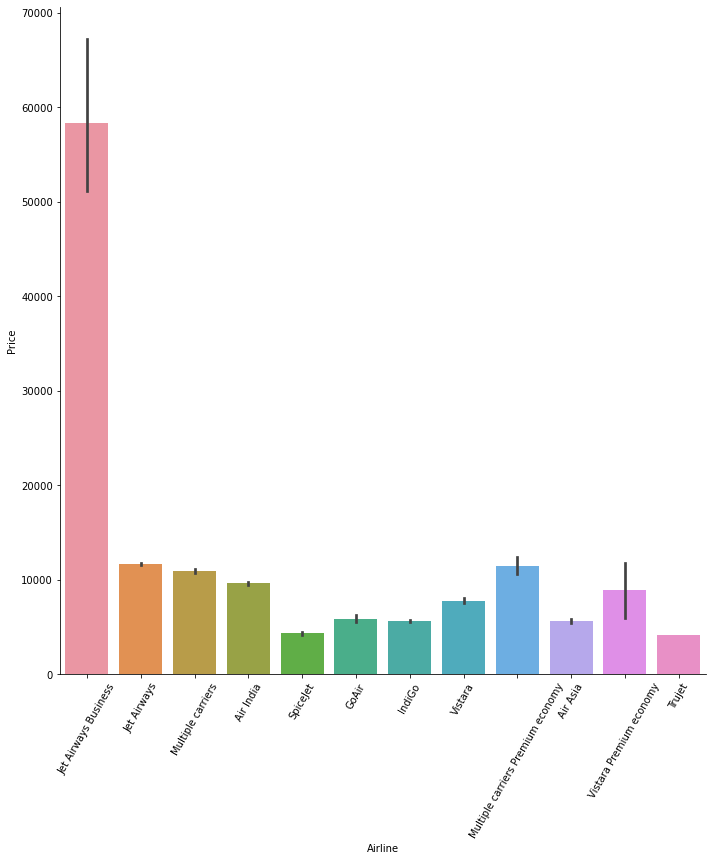

In [13]:
sns.catplot(x="Airline" , y = "Price" , data=df.sort_values("Price" ,ascending = False ) , kind= "bar" , height=10)
plt.xticks(rotation=60)

# Encoding-OneHotEncoder

In [14]:
Airline = df[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)
Airline.head()
#Encoding techniques to replace the values for column Airline...

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [15]:
df["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

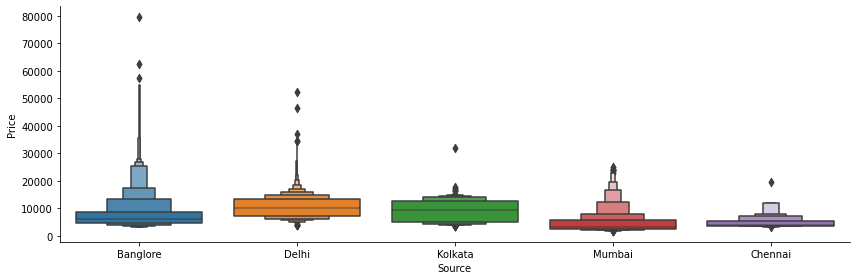

In [16]:
sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [17]:
Source = df[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Source.head()
#Comverting valuer for column using get_dummies in column Source..

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [18]:
df["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [19]:
Destination = df[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()
#Converting values for column in Destination using get_dummies...

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [20]:
df["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [21]:
df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)
#Dropping columns Route and Add_Info...Since they have less information..

In [22]:
df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

# LabelEncoder

In [23]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [24]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [25]:
df1= pd.concat([df, Airline, Source, Destination], axis = 1)

In [26]:
df1.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [27]:
df1.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [28]:
df1.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [29]:
df1.shape

(10682, 30)

In [30]:
df1.skew()

Total_Stops                                    0.317109
Price                                          1.812405
Journey_day                                    0.118174
Journey_month                                 -0.387409
Dep_hour                                       0.112924
Dep_min                                        0.167234
Arrival_hour                                  -0.370146
Arrival_min                                    0.110945
Duration_hours                                 0.851197
Duration_mins                                 -0.090680
Airline_Air India                              1.815902
Airline_GoAir                                  7.217685
Airline_IndiGo                                 1.562601
Airline_Jet Airways                            0.581943
Airline_Jet Airways Business                  42.164359
Airline_Multiple carriers                      2.461548
Airline_Multiple carriers Premium economy     28.616840
Airline_SpiceJet                               3

array([[<AxesSubplot:title={'center':'Total_Stops'}>,
        <AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Journey_day'}>,
        <AxesSubplot:title={'center':'Journey_month'}>,
        <AxesSubplot:title={'center':'Dep_hour'}>,
        <AxesSubplot:title={'center':'Dep_min'}>,
        <AxesSubplot:title={'center':'Arrival_hour'}>,
        <AxesSubplot:title={'center':'Arrival_min'}>,
        <AxesSubplot:title={'center':'Duration_hours'}>,
        <AxesSubplot:title={'center':'Duration_mins'}>],
       [<AxesSubplot:title={'center':'Airline_Air India'}>,
        <AxesSubplot:title={'center':'Airline_GoAir'}>,
        <AxesSubplot:title={'center':'Airline_IndiGo'}>,
        <AxesSubplot:title={'center':'Airline_Jet Airways'}>,
        <AxesSubplot:title={'center':'Airline_Jet Airways Business'}>,
        <AxesSubplot:title={'center':'Airline_Multiple carriers'}>,
        <AxesSubplot:title={'center':'Airline_Multiple carriers Premium economy'}>,
      

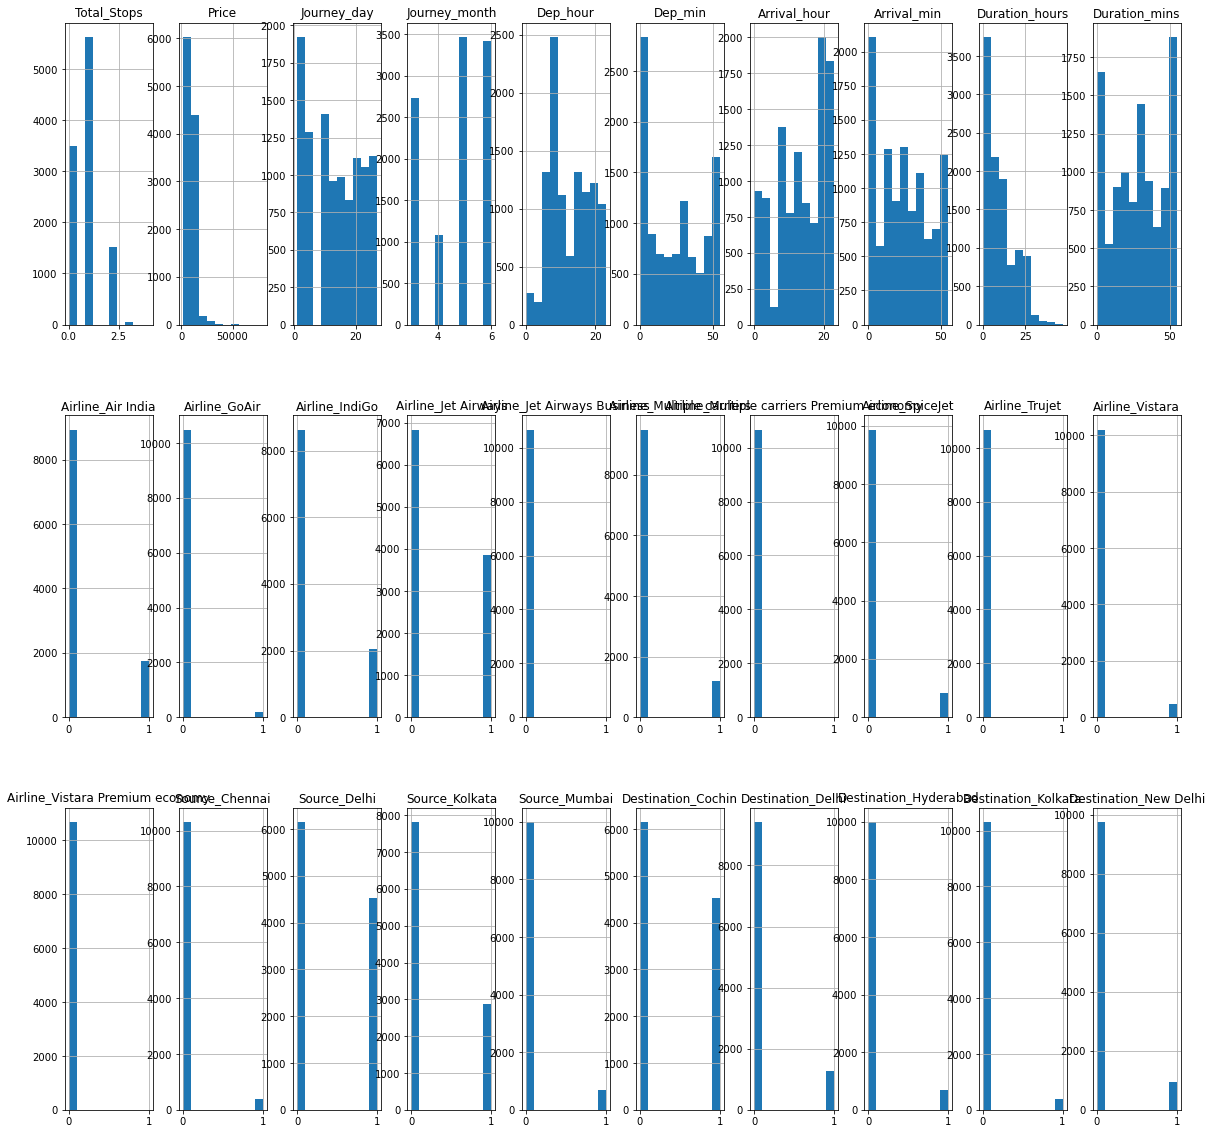

In [31]:
df1.hist(figsize=(20,20),layout=(3,10),sharex=False)

In [32]:
from sklearn.preprocessing import power_transform

In [33]:
df1.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [34]:
df1.shape

(10682, 30)

# Test DAta

In [35]:
data = pd.read_excel("Test_set.xlsx")
data.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,12:35 13 Jun,18h 20m,1 stop,In-flight meal not included
6,Air India,12/03/2019,Banglore,New Delhi,BLR → TRV → DEL,07:30,22:35,15h 5m,1 stop,No info
7,IndiGo,1/05/2019,Kolkata,Banglore,CCU → HYD → BLR,15:15,20:30,5h 15m,1 stop,No info
8,IndiGo,15/03/2019,Kolkata,Banglore,CCU → BLR,10:10,12:55,2h 45m,non-stop,No info
9,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,6h 5m,1 stop,No info


In [36]:
data.shape

(2671, 10)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [38]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [39]:
# Date_of_Journey
data["Journey_day"] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.day
data["Journey_month"] = pd.to_datetime(data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
data["Dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour
data["Dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute
data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
data["Arrival_hour"] = pd.to_datetime(data.Arrival_Time).dt.hour
data["Arrival_min"] = pd.to_datetime(data.Arrival_Time).dt.minute
data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [40]:
duration = list(data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m" 
        else:
            duration[i] = "0h " + duration[i]         

In [41]:
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0])) 
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 

In [42]:
data["Duration_hours"] = duration_hours
data["Duration_mins"] = duration_mins
data.drop(["Duration"], axis = 1, inplace = True)

# CategoricalData

In [43]:
print("Airline")
print("-"*75)
print(data["Airline"].value_counts())
Airline = pd.get_dummies(data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(data["Source"].value_counts())
Source = pd.get_dummies(data["Source"], drop_first= True)

Airline
---------------------------------------------------------------------------
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

Source
---------------------------------------------------------------------------
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64


In [44]:
print()

print("Destination")
print("-"*75)
print(data["Destination"].value_counts())
Destination = pd.get_dummies(data["Destination"], drop_first = True)


Destination
---------------------------------------------------------------------------
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


In [45]:
data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)
#Dropping column Route and Add_Info

In [46]:
data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
#Replacing valuesin column Route..

In [47]:
#Concatenate thie columns which replaced in inew dataset...
data1 = pd.concat([data, Airline, Source, Destination], axis = 1)

data1.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print("Shape of test data : ", data1.shape)
#Dropping columns in datasert...

Shape of test data :  (2671, 28)


In [48]:
data1.head(10)

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0
5,1,12,6,18,15,12,35,18,20,0,...,0,0,1,0,0,1,0,0,0,0
6,1,12,3,7,30,22,35,15,5,1,...,0,0,0,0,0,0,0,0,0,1
7,1,1,5,15,15,20,30,5,15,0,...,0,0,0,1,0,0,0,0,0,0
8,0,15,3,10,10,12,55,2,45,0,...,0,0,0,1,0,0,0,0,0,0
9,1,18,5,16,30,22,35,6,5,0,...,0,0,0,1,0,0,0,0,0,0


In [49]:
data1.dtypes

Total_Stops                          int64
Journey_day                          int64
Journey_month                        int64
Dep_hour                             int64
Dep_min                              int64
Arrival_hour                         int64
Arrival_min                          int64
Duration_hours                       int64
Duration_mins                        int64
Air India                            uint8
GoAir                                uint8
IndiGo                               uint8
Jet Airways                          uint8
Jet Airways Business                 uint8
Multiple carriers                    uint8
Multiple carriers Premium economy    uint8
SpiceJet                             uint8
Vistara                              uint8
Vistara Premium economy              uint8
Chennai                              uint8
Delhi                                uint8
Kolkata                              uint8
Mumbai                               uint8
Cochin     

In [50]:
data1.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata',
       'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [51]:
df1.shape

(10682, 30)

In [52]:
df1.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [53]:
X=df1.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head(5)

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [54]:
y = df1.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

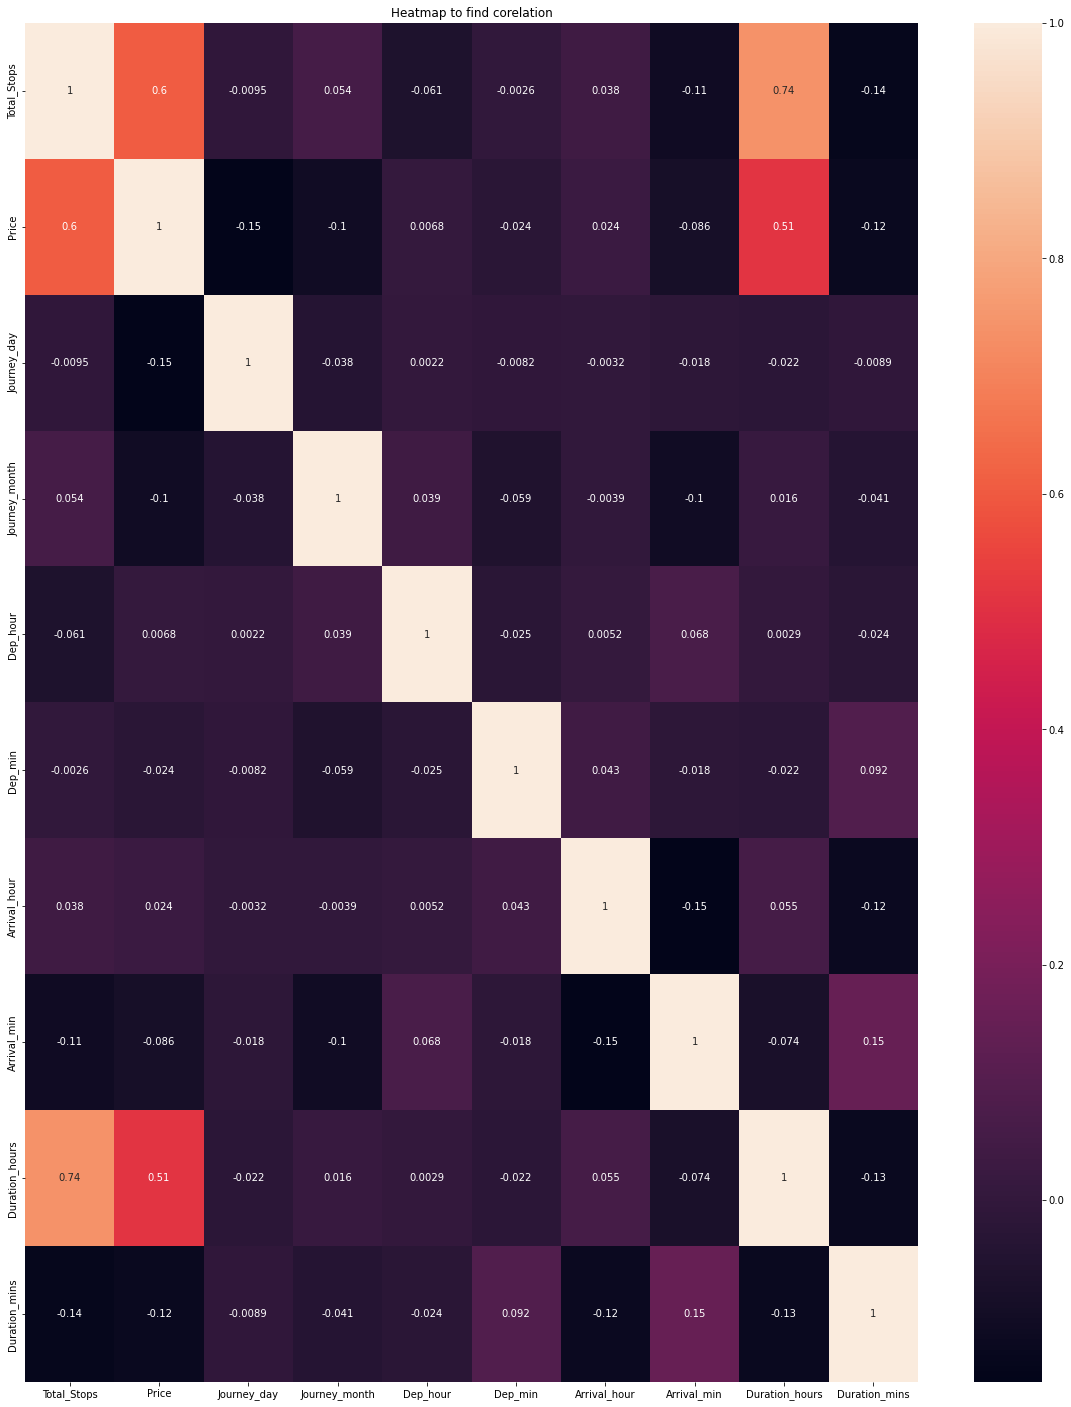

In [55]:
corr=df.corr()
plt.figure(figsize=(20,25))
sns.heatmap(corr,annot=True,annot_kws={'size':10})
plt.title("Heatmap to find corelation")
plt.show

# ModelBuilding

# RandomforestRegressor

In [56]:
from sklearn.ensemble import RandomForestRegressor
RAN = RandomForestRegressor()
RAN.fit(X, y)

RandomForestRegressor()

In [57]:
print(RAN.feature_importances_)

[3.16560571e-02 1.41447752e-01 5.28507538e-02 2.71473489e-02
 2.23233618e-02 3.46069986e-02 1.89742900e-02 4.42787571e-01
 1.83768896e-02 4.75538641e-03 1.05141455e-03 7.62143270e-03
 6.32526255e-02 6.38301611e-02 1.92382089e-02 8.41771702e-04
 2.92816110e-03 7.24902472e-06 3.23300558e-03 5.63516973e-05
 7.35111023e-04 2.61620808e-03 3.21396351e-03 3.58161292e-03
 2.65913385e-03 2.10482767e-04 3.78699910e-03 5.55858125e-04
 2.56538399e-02]


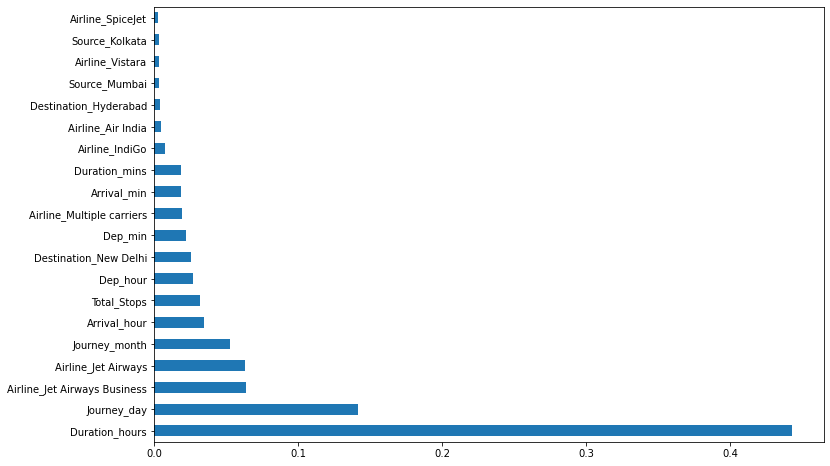

In [58]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(RAN.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [59]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Train and Test

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [61]:
y_pred = RAN.predict(x_test)

In [62]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(x_train,y_train)

# prediction
predRF=RF.predict(x_test)
print('R2_Score:',r2_score(y_test,predRF))

# Metric evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predRF))
print('MSE:',metrics.mean_squared_error(y_test, predRF))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predRF)))

R2_Score: 0.7971899051770622
MAE: 1175.24430554805
MSE: 4373002.687680776
RMSE: 2091.1725628653357


In [63]:
print('Random Forest:',cross_val_score(RF,X,y,cv=5).mean())

Random Forest: 0.8117231361764217


# DecisiontreeRegressor

In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [65]:
DT=DecisionTreeRegressor()
DT.fit(x_train,y_train)

# prediction
predDT=DT.predict(x_test)
print('R2_Score:',r2_score(y_test,predDT))

# Metric evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predDT))
print('MSE:',metrics.mean_squared_error(y_test, predDT))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predDT)))

R2_Score: 0.7285284471693511
MAE: 1333.646038059585
MSE: 5853484.912542115
RMSE: 2419.3976342350416


# GradientBoostingRegressor

In [66]:
GRA=GradientBoostingRegressor()
GRA.fit(x_train,y_train)

# prediction
predGRA=GRA.predict(x_test)
print('R2_Score:',r2_score(y_test,predGRA))

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predGRA))
print('MSE:',metrics.mean_squared_error(y_test, predGRA))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predGRA)))

R2_Score: 0.7858421385144565
MAE: 1527.3467711419971
MSE: 4617683.8716133265
RMSE: 2148.8796782540726


In [67]:
print('GradientBoosting:',cross_val_score(GRA,X,y,cv=5).mean())

GradientBoosting: 0.7687984161373737


# BaggingRegressor

In [68]:
from sklearn.ensemble import BaggingRegressor

In [69]:
BAG=BaggingRegressor()
BAG.fit(x_train,y_train)

# prediction
predBAG=BAG.predict(x_test)
print('R2_Score:',r2_score(y_test,predBAG))

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predBAG))
print('MSE:',metrics.mean_squared_error(y_test, predBAG))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predBAG)))

R2_Score: 0.7896730249351882
MAE: 1191.0945467256968
MSE: 4535082.082838043
RMSE: 2129.5732161252504


In [70]:
print('Bagging:',cross_val_score(GRA,X,y,cv=5).mean())

Bagging: 0.7689076412043921


# LinearRegression

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
LIN=LinearRegression()
LIN.fit(x_train,y_train)

# prediction
predLIN=LIN.predict(x_test)
print('R2_Score:',r2_score(y_test,predLIN))

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predLIN))
print('MSE:',metrics.mean_squared_error(y_test, predLIN))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predLIN)))

R2_Score: 0.61959437290701
MAE: 1972.9372855148047
MSE: 8202327.557407134
RMSE: 2863.9705929717807


In [73]:
print('Linear:',cross_val_score(LIN,X,y,cv=5).mean())

Linear: 0.6199027318916418


# HyperParameterTuning

In [74]:
from sklearn.model_selection import RandomizedSearchCV

# RandomizedSearch 

In [75]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 20, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 25]
min_samples_leaf = [1, 2, 5, 10]

In [76]:
#RAndomGrid tuning..
RAN_grid= {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [78]:
rf_RAN= RandomizedSearchCV(estimator = RF, param_distributions = RAN_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42)

In [80]:
rf_RAN.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=17; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=17; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=17; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=17; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=17; total time=   0.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=19; total time=   0.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=19; total time=   0.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=19; tot

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 25],
                                        'n_estimators': [10, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19,
                                                         20]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [81]:
rf_RAN.best_params_

{'n_estimators': 15,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [83]:
pred = rf_RAN.predict(x_test)
pred

array([17242.59473862,  5746.504329  ,  8711.33707723, ...,
        6789.95922656, 12535.59128205, 12968.9022481 ])

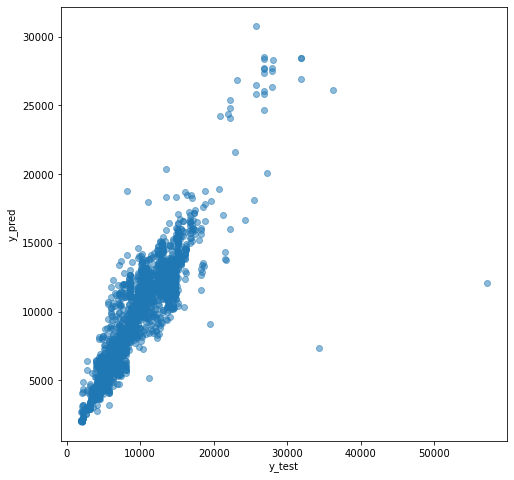

In [85]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [88]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1184.6256663647275
MSE: 4190943.1063900394
RMSE: 2047.179304894918


# ModelSaving

In [89]:
import joblib
joblib.dump(pred,"Flight_Ticket.pkl")

['Flight_Ticket.pkl']